In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())
# Directory should be at github repo level.
# .. to move up 2 directory level.
os.chdir("..")
print(os.getcwd())

C:\Users\Hp\Desktop\LSE\MVD\2024-project-pollution-team\CODE_INDIA
C:\Users\Hp\Desktop\LSE\MVD\2024-project-pollution-team


In [3]:
dataset = pd.read_csv("DATA_INDIA/CLEAN_MERGED/complete_dataset.csv")
display(dataset)

Unnamed: 0              State           City  City Population  \
0             0  arunachal pradesh     naharlagun              NaN   
1             2     andhra pradesh       chittoor              NaN   
2             3     andhra pradesh         kadapa              NaN   
3             4     andhra pradesh      anantapur         240442.0   
4             5     andhra pradesh  visakhapatnam        1063178.0   
..          ...                ...            ...              ...   
260         276              bihar         munger              NaN   
261         277              bihar           gaya         423692.0   
262         278          jharkhand        dhanbad         219636.0   
263         280          jharkhand      pathardih              NaN   
264         281           nagaland         kohima              NaN   

     State Population  State Area (sq. km)  Forest Area(sq. km in state)  \
0           1580000.0              83743.0                       66431.0   
1          53402000.0             162968.0                       29784.0   
2          53402000.0             162968.0                       29784.0   
3          53402000.0             162968.0                       29784.0   
4          53402000.0             162968.0                       29784.0   
..                ...                  ...                           ...   
260       129205000.0              94163.0                        7381.0   
261       129205000.0              94163.0                        7381.0   
262        40129000.0              79716.0                       23721.0   
263        40129000.0              79716.0                       23721.0   
264         2258000.0              16579.0                       12251.0   

     Registered Vehicles in City  Registered Vehicles in State  \
0                            NaN                      230126.0   
1                            NaN                    13108491.0   
2                            NaN                    13108491.0   
3                            NaN                    13108491.0   
4                            NaN                    13108491.0   
..                           ...                           ...   
260                          NaN                     9903889.0   
261                          NaN                     9903889.0   
262                      60880.0                     5064983.0   
263                          NaN                     5064983.0   
264                          NaN                      520293.0   

     Framing Area (sq. km in state)  ...  Humidity  Wind  Precipitation  \
0                              35.4  ...     71.55  1.44           0.02   
1                             351.3  ...     74.38  2.30           0.02   
2                             351.3  ...     71.07  2.43           0.01   
3                             351.3  ...     60.61  3.27           0.01   
4                             351.3  ...     77.01  2.58           0.00   
..                              ...  ...       ...   ...            ...   
260                           546.3  ...     68.10  2.35           0.07   
261                           546.3  ...     71.86  2.14           0.07   
262                           128.6  ...     58.06  2.33           0.02   
263                           128.6  ...     58.06  2.33           0.02   
264                           217.7  ...     76.66  1.03           0.02   

     Clouds  Sunshine  Coal Capacity (Max Electricity ouput in MW)  \
0     32.29     95.08                                          0.0   
1     35.85    125.92                                      11275.0   
2     29.30    119.31                                      11275.0   
3     29.93    166.00                                      11275.0   
4     22.71    134.31                                      11275.0   
..      ...       ...                                          ...   
260   18.96    200.46                                      10040.0 

In [4]:
# Aggregating relevant state-level data
state_level_df = dataset.groupby('State').agg({
    'State Population': 'first',  # State population is the same for all cities in a state
    'State Area (sq. km)': 'first',
    'Forest Area(sq. km in state)': 'first',
    'Registered Vehicles in State': 'first',
    'Framing Area (sq. km in state)': 'first',
    'Farmers (in state)': 'first',
    'Factories (in state)': 'first',
    'Shipping Cargo Volume ( million metric tons in state)': 'first',
    'Coal Capacity (Max Electricity ouput in MW)': 'first',  
    'Gas Capacity (Max Electricity ouput in MW)': 'first',
    'Temperature': 'mean',
    'Pressure': 'mean',
    'Humidity': 'mean',
    'Wind': 'mean',
    'Precipitation': 'mean',
    'Clouds': 'mean',
    'Sunshine': 'mean',
    'aqi': 'mean',  # Average AQI across cities in the state
    'missing_aqi': 'mean'  # Average of missing AQI proportions
}).reset_index()

# Define AQI categories and corresponding labels
aqi_bins = [0, 50, 100, 200, 300, 400, 500]
aqi_labels = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]

# Add the AQI_Category column with categorical data type
state_level_df['AQI Category'] = pd.cut(
    state_level_df['aqi'], 
    bins=aqi_bins, 
    labels=aqi_labels, 
    include_lowest=True
)

# Convert AQI_Category to a categorical data type with ordered categories
state_level_df['AQI Category'] = pd.Categorical(
    state_level_df['AQI Category'], 
    categories=aqi_labels, 
    ordered=True
)

display(state_level_df)

State  State Population  State Area (sq. km)  \
0      andhra pradesh        53402000.0             162968.0   
1   arunachal pradesh         1580000.0              83743.0   
2               assam        36159000.0              78438.0   
3               bihar       129205000.0              94163.0   
4          chandigarh         1247000.0                114.0   
5        chhattisgarh        30638000.0             135192.0   
6               delhi        21884000.0               1483.0   
7             gujarat        72653000.0             196244.0   
8             haryana        30694000.0              44212.0   
9    himachal pradesh         7518000.0              55673.0   
10          jharkhand        40129000.0              79716.0   
11          karnataka        68256000.0             191791.0   
12             kerala        35967000.0              38852.0   
13     madhya pradesh        87954000.0             308252.0   
14        maharashtra       127684000.0             307713.0   
15            manipur         3260000.0              22327.0   
16          meghalaya         3387000.0              22429.0   
17            mizoram         1252000.0              21081.0   
18           nagaland         2258000.0              16579.0   
19             odisha        46663000.0             155707.0   
20         puducherry         1695000.0                490.0   
21             punjab        30992000.0              50362.0   
22          rajasthan        82188000.0             342239.0   
23             sikkim          697000.0               7096.0   
24         tamil nadu        77165000.0             130060.0   
25          telangana        38317000.0             112077.0   
26      uttar pradesh       238875000.0             240928.0   
27        uttarakhand        11795000.0              53483.0   
28        west bengal        99723000.0              88752.0   

    Forest Area(sq. km in state)  Registered Vehicles in State  \
0                       29784.00                    13108491.0   
1                       66431.00                      230126.0   
2                       28312.00                     4358529.0   
3                        7381.00                     9903889.0   
4                          22.88                     1058857.0   
5                       55717.00                     6986219.0   
6                         195.00                    11892877.0   
7                       14926.00                    26836981.0   
8                        1603.00                     8599668.0   
9                       15443.00                     1711920.0   
10                      23721.00                     5064983.0   
11                      38730.00                    26117614.0   
12                      21253.00                    14184184.0   
13                      77493.00                    17923162.0   
14                      50798.00                    37786256.0   
15                      16598.00                      361970.0   
16                      17046.00                      365804.0   
17                      17820.00                      267350.0   
18                      12251.00                      520293.0   
19                      52156.00                     9115718.0   
20                         53.30                     1118782.0   
21                       1847.00                    11336366.0   
22                      16655.00                    19236010.0   
23                       3341.00                       54106.0   
24                      26419.00                    32094588.0   
25                      21214.00                    12906426.0   
26                      14818.00                    34924824.0   
27                      24305.00                     2898982.0   
28                      16832.00                    10915952.0   

    Framing Area (sq. km in state)  Farmers (in state)  Factories (in state)  \
0                            351.3

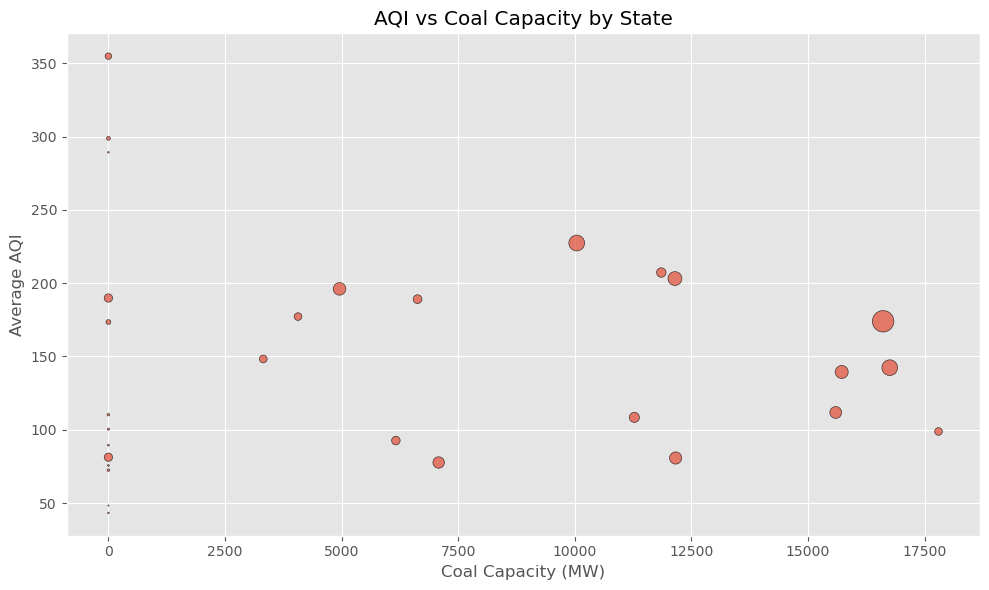

In [5]:
plt.style.use('ggplot')

# -------------------------------------------
# 1. Scatter Plot: AQI vs Coal Capacity
# -------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(state_level_df['Coal Capacity (Max Electricity ouput in MW)'], state_level_df['aqi'], 
            s=state_level_df['State Population'] / 1e6, alpha=0.7, edgecolors='black')
plt.xlabel('Coal Capacity (MW)')
plt.ylabel('Average AQI')
plt.title('AQI vs Coal Capacity by State')
plt.grid(True)
plt.tight_layout()
plt.show()

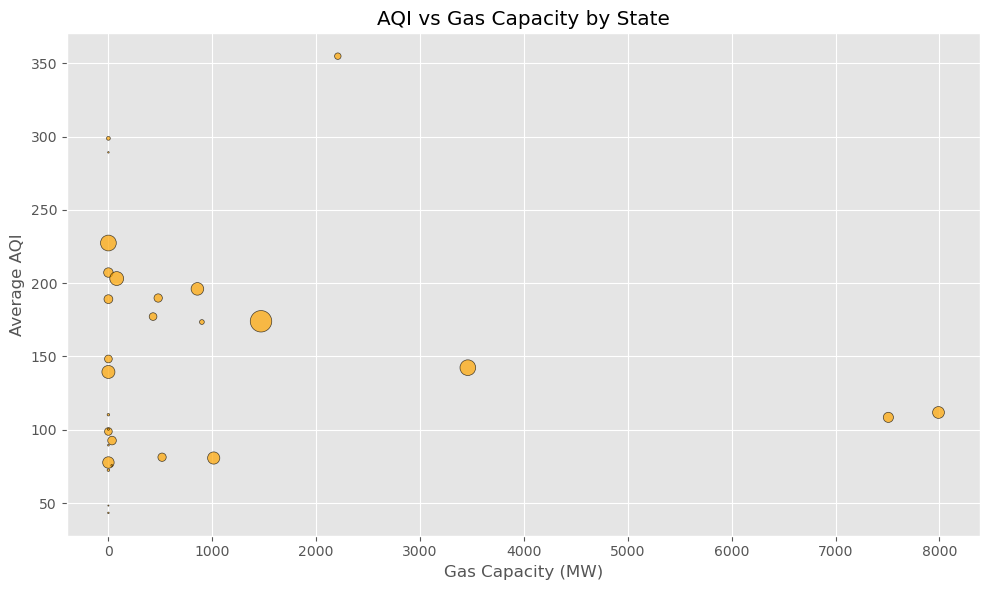

In [6]:
# -------------------------------------------
# 2. Scatter Plot: AQI vs Gas Capacity
# -------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(state_level_df['Gas Capacity (Max Electricity ouput in MW)'], state_level_df['aqi'], 
            s=state_level_df['State Population'] / 1e6, alpha=0.7, edgecolors='black', color='orange')
plt.xlabel('Gas Capacity (MW)')
plt.ylabel('Average AQI')
plt.title('AQI vs Gas Capacity by State')
plt.grid(True)
plt.tight_layout()
plt.show()

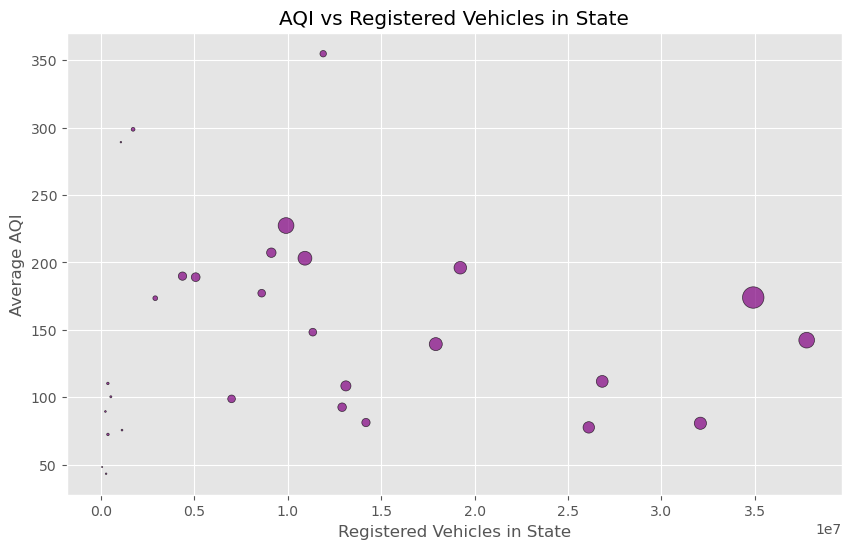

In [7]:
# Scatter Plot: Registered Vehicles vs AQI
plt.figure(figsize=(10, 6))
plt.scatter(state_level_df['Registered Vehicles in State'], state_level_df['aqi'], 
            s=state_level_df['State Population'] / 1e6,  # Bubble size based on state population
            color='purple', alpha=0.7, edgecolors='black')

# Adding labels and title
plt.xlabel('Registered Vehicles in State')
plt.ylabel('Average AQI')
plt.title('AQI vs Registered Vehicles in State')
plt.grid(True)


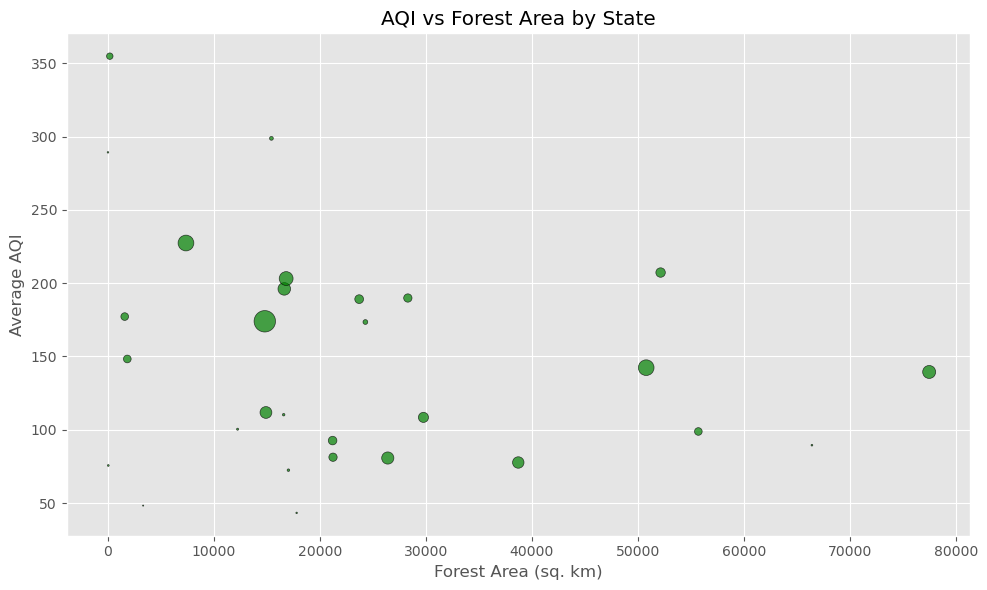

In [8]:
# -------------------------------------------
# 4. Scatter Plot: Forest Area vs AQI
# -------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(state_level_df['Forest Area(sq. km in state)'], state_level_df['aqi'], 
            s=state_level_df['State Population'] / 1e6, alpha=0.7, edgecolors='black', color='green')
plt.xlabel('Forest Area (sq. km)')
plt.ylabel('Average AQI')
plt.title('AQI vs Forest Area by State')
plt.grid(True)
plt.tight_layout()
plt.show()

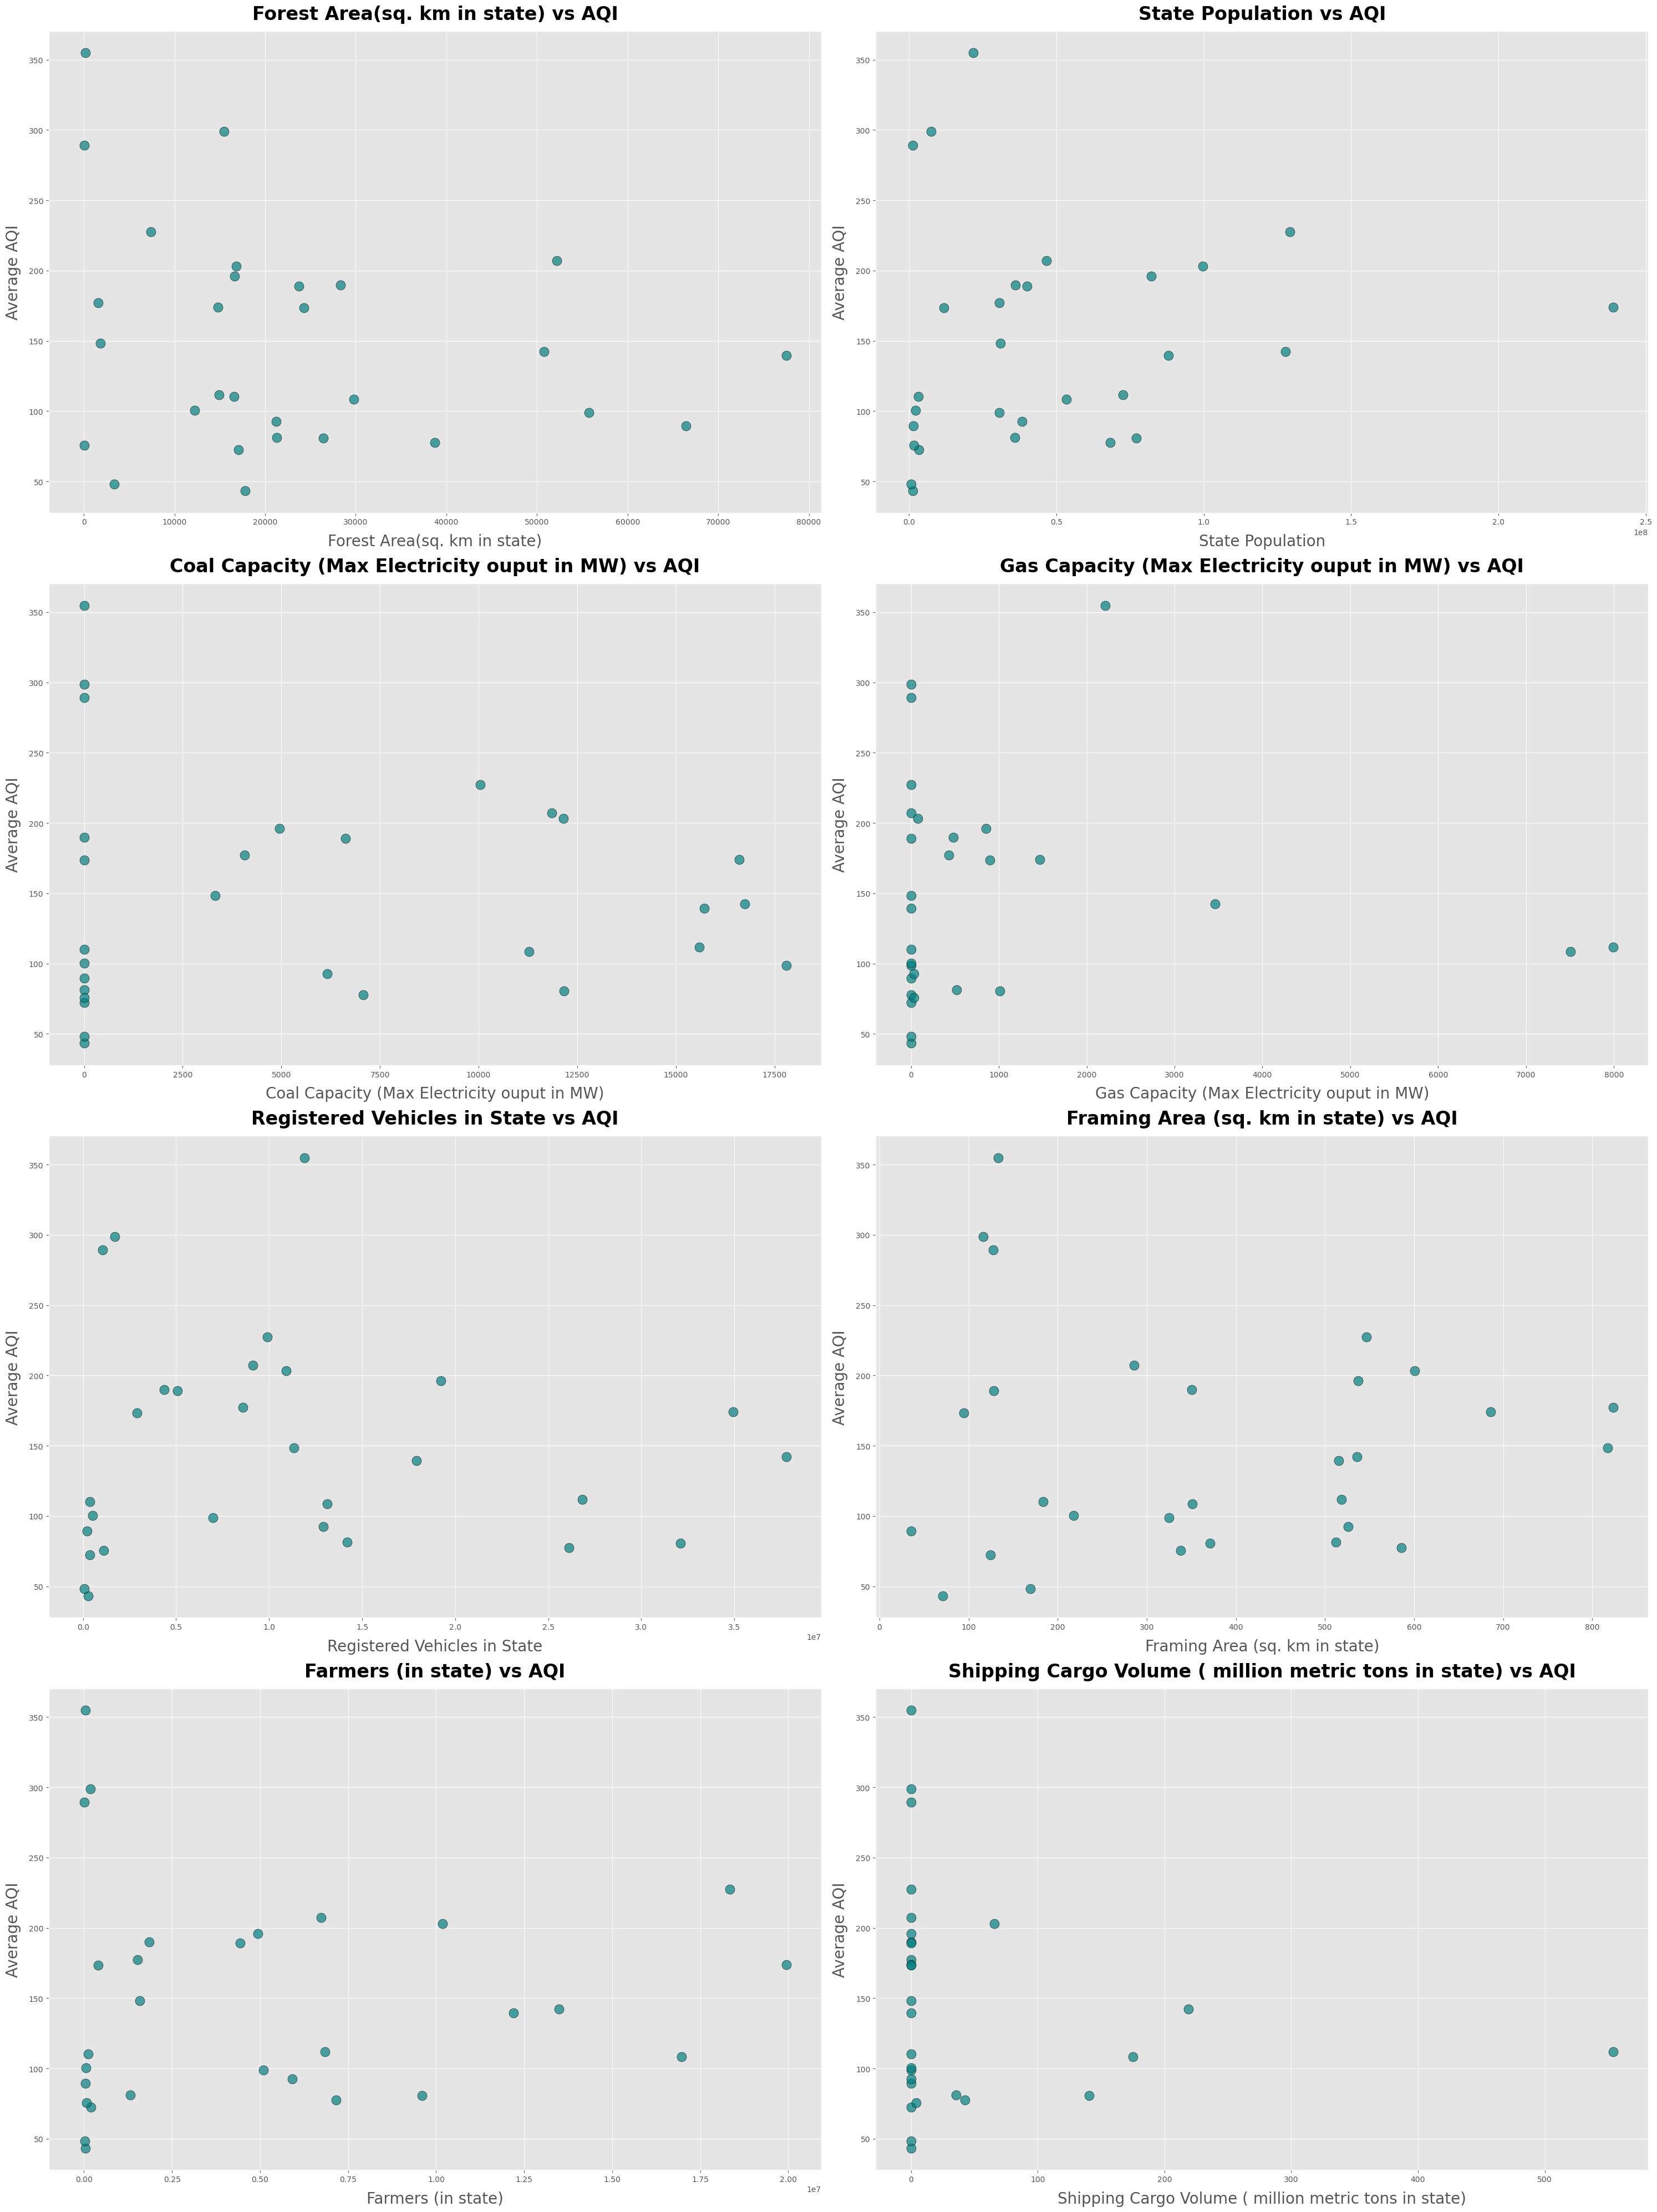

In [9]:
import matplotlib.pyplot as plt

# List of independent variables to plot against AQI
variables = [
    'Forest Area(sq. km in state)',
    'State Population',
    'Coal Capacity (Max Electricity ouput in MW)',
    'Gas Capacity (Max Electricity ouput in MW)',
    'Registered Vehicles in State',
    'Framing Area (sq. km in state)',
    'Farmers (in state)',
    'Shipping Cargo Volume ( million metric tons in state)'
]

# Set up the subplot grid (2 rows x 4 columns for 8 plots)
fig, axes = plt.subplots(4, 2, figsize=(30, 40))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Create scatter plots for each variable against AQI
for i, var in enumerate(variables):
    axes[i].scatter(state_level_df[var], state_level_df['aqi'],
                    alpha=0.7, edgecolor='black', color='teal', s = 150)
    axes[i].set_xlabel(var, fontsize=20, labelpad=10)
    axes[i].set_ylabel('Average AQI', fontsize=20, labelpad=10)
    axes[i].set_title(f'{var} vs AQI', fontsize=24, fontweight='bold', pad=15)
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


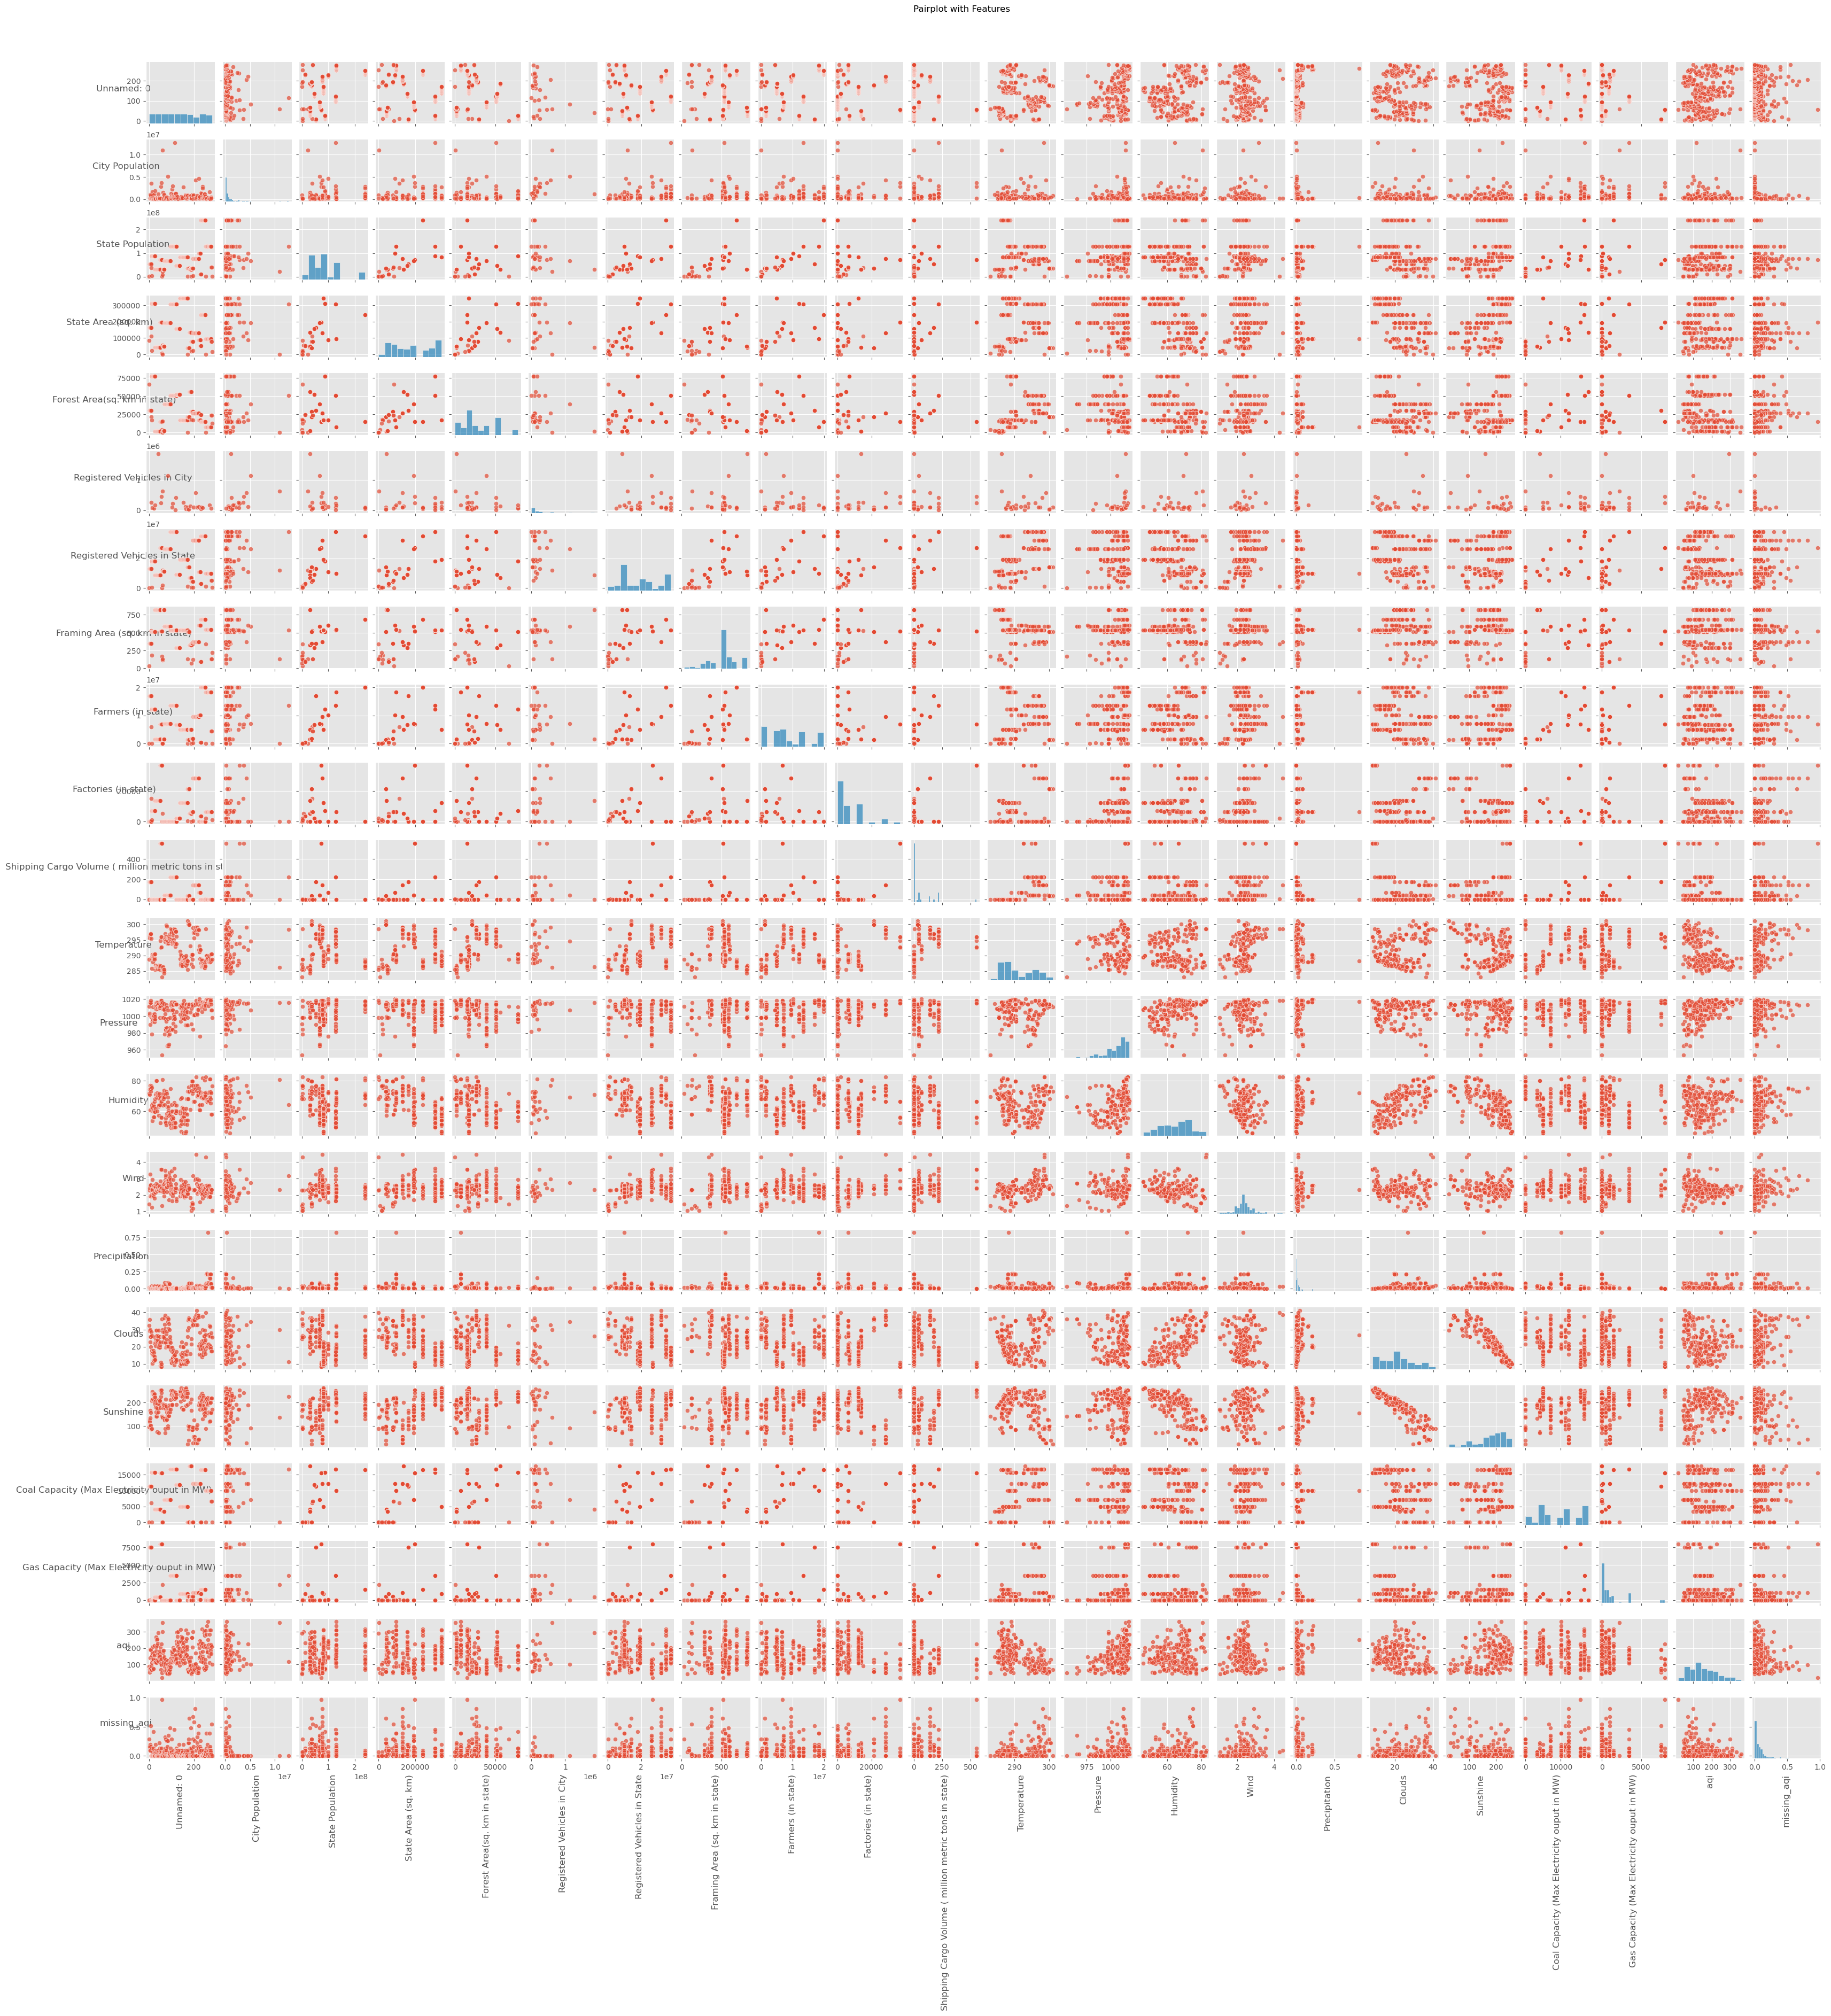

In [14]:
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])
pairplot = sns.pairplot(numeric_dataset, diag_kind="hist", plot_kws={'alpha': 0.7}, height=1.5)

for ax in pairplot.axes.flatten():
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), rotation=90)  
        ax.set_ylabel(ax.get_ylabel(), rotation=90)   

plt.suptitle("Pairplot with Features", y=1.02)

plt.show()